In this exercise, you'll apply what you learned in the **Parsing dates** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [ ]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex3 import *
print("Setup Complete")

# Get our environment set up

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset containing information on earthquakes that occured between 1965 and 2016.

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

# 1) Check the data type of our date column

You'll be working with the "Date" column from the `earthquakes` dataframe.  Investigate this column now: does it look like it contains dates?  What is the data type of the column?

In [19]:
# TODO: Your code here!


Once you have answered the question above, run the code cell below to get credit for your work.

In [5]:
q1.check()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object


In [ ]:
# Line below will give you a hint
#_COMMENT_IF(PROD)_
q1.hint()

# 2) Convert our date columns to datetime

Create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it. 

In [12]:
# 
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

earthquakes[earthquakes['Date']=='1975-02-23T02:58:41.000Z']

# Check your answer
q2.check()

ValueError: time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

# 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [14]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

# View the first five rows of your answer

# Check your answer
q3.check()

AttributeError: Can only use .dt accessor with datetimelike values

# 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

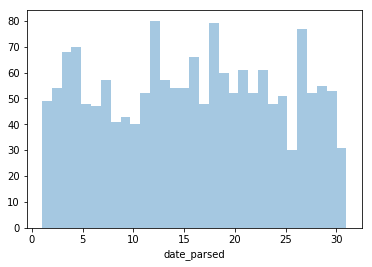

In [17]:
# remove na's
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

Does the graph make sense to you?

In [ ]:
q4.check()

# (Optional) Bonus Challenge

For an extra challenge, you'll work with a [Smithsonian dataset](https://www.kaggle.com/smithsonian/volcanic-eruptions) that documents Earth's volcanoes and their eruptive history over the past 10,000 years 

Run the next code cell to load the data.

In [20]:
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")T

1471    1962 CE
617     1996 CE
305      950 CE
1199    1720 CE
1256    Unknown
Name: Last Known Eruption, dtype: object

Try parsing the column "Last Known Eruption" from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [ ]:
volcanos['Last Known Eruption'].sample(5)

# (Optional) More practice

If you're interested in graphing time series, [check out this tutorial](https://www.kaggle.com/residentmario/time-series-plotting-optional).

You can also look into passing columns that you know have dates in them  the `parse_dates` argument in `read_csv`. (The documention [is here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).) Do note that this method can be very slow, but depending on your needs it may sometimes be handy to use.

# Keep going

In the next lesson, learn how to [**work with character encodings**](#$NEXT_NOTEBOOK_URL$).